<a href="https://colab.research.google.com/github/davidriveraarbelaez/IA_Explorador/blob/main/Tema_1_supuesto_del_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1. Importar las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from scipy import stats
from scipy.stats import shapiro

Paso 2. Preparación de los datos

In [ ]:
data = pd.read_csv('/content/product_ratings.csv')
X = data['views'].values
y = data['rating'].values


Paso 3: Ajustar el Modelo de Regresión Lineal manualmente

In [ ]:
# Calcular las medias
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calcular la pendiente y la intersección
m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
b = y_mean - m * X_mean

# Generar predicciones
y_pred = m * X + b

# Calcular residuos
residuals = y - y_pred


Paso 4: Verificación de los supuestos

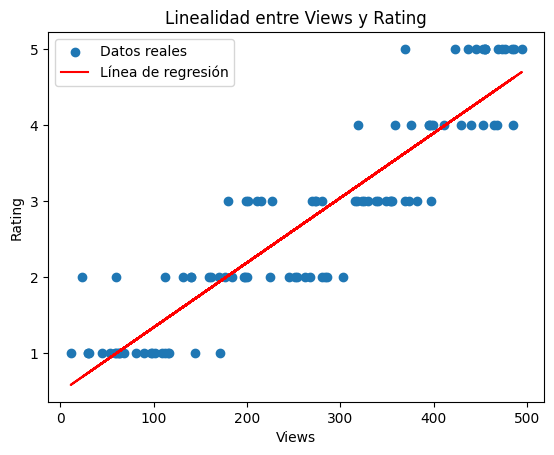

In [ ]:
# 1.Verificar linealidad
"""
Graficamos los puntos de views frente a rating junto con la línea de regresión
para verificar si hay una relación lineal.
"""
plt.scatter(X, y, label="Datos reales")
plt.plot(X, y_pred, color="red", label="Línea de regresión")
plt.xlabel("Views")
plt.ylabel("Rating")
plt.title("Linealidad entre Views y Rating")
plt.legend()
plt.show()

In [ ]:
# 2. Verificar Independencia de los Errores
"""
Calculamos el estadístico de Durbin-Watson para verificar la independencia de
los errores. Un valor cercano a 2 indica independencia.
"""

dw_stat = sm.stats.durbin_watson(residuals)
print("Durbin-Watson:", dw_stat)
# Interpretación:
# - Valor cercano a 2 indica independencia.
# - Valor cercano a 0 sugiere autocorrelación positiva.
# - Valor cercano a 4 sugiere autocorrelación negativa.

Durbin-Watson: 2.04596385793744


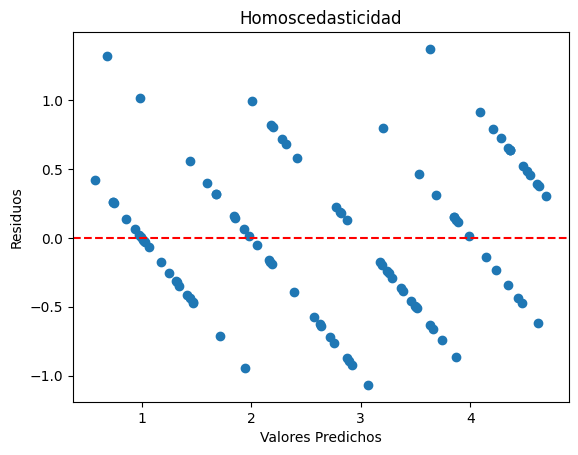

In [ ]:
# 3. Verificar Homoscedasticidad
"""
Graficamos los residuos frente a los valores predichos. Un patrón aleatorio
sugiere homoscedasticidad, mientras que un patrón sistemático sugiere
heteroscedasticidad.
"""

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Homoscedasticidad")
plt.show()

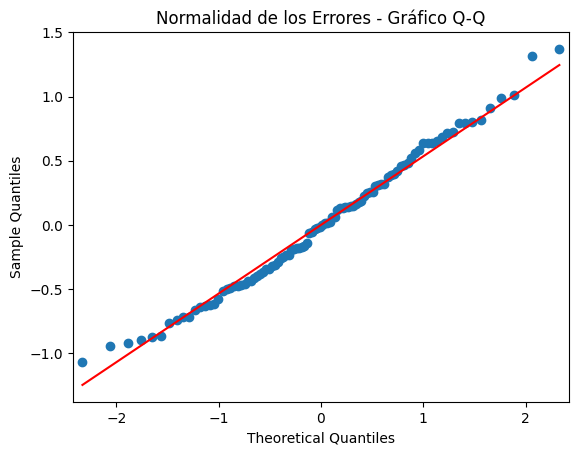

In [ ]:
# 4. Verificar Normalidad de los Errores
"""
Verificamos la normalidad de los errores con un gráfico Q-Q y la prueba de
Shapiro-Wilk.

Gráfico Q-Q:
"""

sm.qqplot(residuals, line='s')
plt.title("Normalidad de los Errores - Gráfico Q-Q")
plt.show()

In [ ]:
# 4 Prueba de Shapiro-Wilk:

shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)
# Interpretación:
# - p > 0.05: No hay evidencia suficiente para rechazar la normalidad.
# - p < 0.05: Rechazamos la hipótesis de normalidad.

Shapiro-Wilk Test p-value: 0.3810932475459274
